In [1]:
import os
from bs4 import BeautifulSoup, NavigableString, Tag 

from nltk.util import ngrams
from nltk import word_tokenize

import json
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as plt
import seaborn as sns

import collections
import csv

from datetime import datetime
from pytz import timezone

print "imported"

imported


In [2]:
# IMPORTS SPECIFIC TO TOPIC MODELING

import langid
import nltk
import re
import time
from collections import defaultdict
from configparser import ConfigParser
from gensim import corpora, models, similarities
from nltk.tokenize import RegexpTokenizer
from string import digits
import pyLDAvis.gensim

print "imported"

imported


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

print "imported"

imported


In [46]:
stringdir = '../papers/strings/'

filenames = [stringdir + filename for filename in os.listdir(stringdir) if not filename.startswith('.')]
# filenames

### Source

In [ ]:
https://de.dariah.eu/tatom/topic_model_mallet.html

### Processing MALLET output

In [47]:
# import numpy as np
# import os
import itertools
import operator
print 'imported'

imported


In [90]:
# CREATE TRIPLES

f = open(modelsdir + "doc-topics.txt")
f.readline()
# f.readline()
l = f.readline()
docnum, docname, values = trippler(l)

In [93]:
for topic, share in grouper(2, values):
    print int(topic), float(share)

0 0.540170940171
3 0.140710751237
4 0.132883490778
5 0.0837606837607
2 0.0556905083221
1 0.046783625731


In [94]:
doctopic_triples = []
mallet_docnames = []

modelsdir = '../papers/models/mallet/'

with open(modelsdir + "doc-topics.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, values = trippler(line)
        mallet_docnames.append(docname)
        for topic, share in grouper(2, values):
            triple = (docname, int(topic), float(share))
            doctopic_triples.append(triple)

In [95]:
# SORT TRIPLES

In [96]:
# triple is (docname, topicnum, share) so sort(key=operator.itemgetter(0,1))
# sorts on (docname, topicnum) which is what we want

doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

# sort the document names rather than relying on MALLET's ordering
mallet_docnames = sorted(mallet_docnames)

# collect into a document-term matrix
num_docs = len(mallet_docnames)

num_topics = len(doctopic_triples) // len(mallet_docnames)

In [100]:
# The following method is considerably faster. 
# It uses the itertools library which is part of the Python standard library.

doctopic = np.zeros((num_docs, num_topics))

for i, (doc_name, triples) in enumerate(itertools.groupby(doctopic_triples, key=operator.itemgetter(0))):
    doctopic[i, :] = np.array([share for _, _, share in triples])

In [101]:
essay_names = [filename.split('.')[0] for filename in os.listdir(stringdir) if not filename.startswith('.')]

# turn this into an array so we can use NumPy functions
essay_names = np.asarray(essay_names)

doctopic_orig = doctopic.copy()

# use method described in preprocessing section
num_groups = len(set(essay_names))
doctopic_grouped = np.zeros((num_groups, num_topics))

for i, name in enumerate(sorted(set(essay_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[essay_names == name, :], axis=0)
    
doctopic = doctopic_grouped

In [104]:
1/5

0

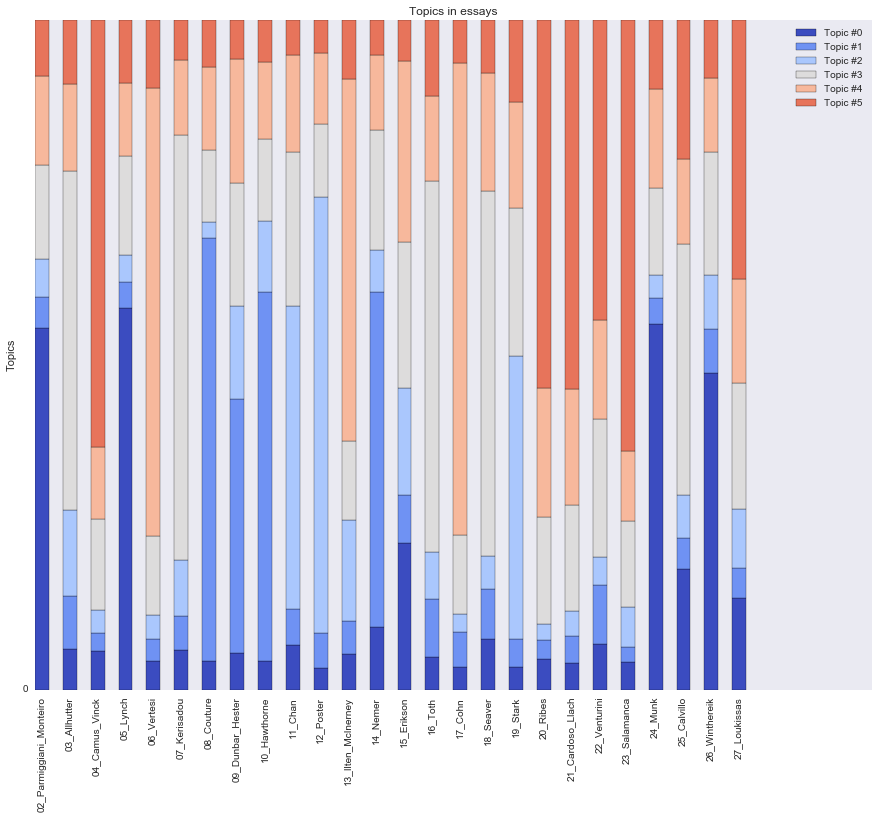

In [108]:
N, K = doctopic.shape
ind = np.arange(N)
width = 0.5

plots = []
height_cumulative = np.zeros(N)

plt.figure(figsize=(15,12))

for k in range(K):
    color = plt.cm.coolwarm(float(k)/float(K), 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)
    
plt.ylim((0, 1))
plt.ylabel('Topics')
plt.title('Topics in essays')
plt.xticks(ind+width/2, essay_names, rotation='vertical')
plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels)
plt.show()

In [110]:
with open(modelsdir + 'topic-keys.txt') as input:
    topic_keys_lines = input.readlines()

topic_words = []

for line in topic_keys_lines:
    _, _, words = line.split('\t')
    words = words.rstrip().split(' ')
    topic_words.append(words)
    
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: infrastructural gps knowledge experts energy issue project questions infrastructure public controversy maps venus environmental infrastructures
Topic 1: code source internet technology people women language project life open projects spip case form definition
Topic 2: digital service technologies workers call labor global technology human social center voice sound scholars sts
Topic 3: human users computing world user knowledge computer algorithms practices research relations time make nature technological
Topic 4: software work social studies media time sts ways systems focus tools working movement organizational present
Topic 5: data digital design network material analysis actors artifacts social networks action materiality information process actor


In [26]:
def grouper(n, iterable, fillvalue=None):
    #Collect data into fixed-length chunks or blocks
    args = [iter(iterable)] * n
    return itertools.izip_longest(*args, fillvalue=fillvalue)

In [22]:
def trippler(line):
    line = line.rstrip().split('\t')
    return line[0], line[1], line[2:]